

# Compare two simulations


In [15]:
import glob
import numpy as np
import psutil
import pyvista as pv
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import geopandas as gpd

size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


def stat(x):
    mean = np.nanmean(x)
    median = np.nanquantile(x, 0.5)
    quartile1 = np.nanquantile(x, 0.25)
    quartile3 = np.nanquantile(x, 0.75)
    std = np.nanstd(x)
    return mean, median, quartile1, quartile3, std


def get_human_readable_size(num):
    # https://stackoverflow.com/questions/21792655/psutil-virtual-memory-units-of-measurement
    exp_str = [(0, 'B'), (10, 'KB'), (20, 'MB'),
               (30, 'GB'), (40, 'TB'), (50, 'PB'), ]
    i = 0
    while i+1 < len(exp_str) and num >= (2 ** exp_str[i+1][0]):
        i += 1
        rounded_val = round(float(num) / 2 ** exp_str[i][0], 2)
    return '%s %s' % (int(rounded_val), exp_str[i][1])


def check_virtual_memory():
    # https://psutil.readthedocs.io/en/latest/#psutil.virtual_memory
    values = psutil.virtual_memory()
    print("Virtual memory usage - " +
          "total: " + str(get_human_readable_size(values.total)) + " / " +
          "available: " + str(get_human_readable_size(values.available)) + " / " +
          "percent used: " + str(values.percent) + " %"
          )


# load data 1
url='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_sansDHDt_avecVisco_R2/'
url1='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_sansDHDt_avecVisco_R4/'
files = sorted(glob.glob(url + 'mesh_24/OPTIM_sansDHDT_avecVisco_R2__t*.pvtu'))
figure='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/'


# figure=url + 'figure/'
files = sorted(files)


blocks = pv.MultiBlock([pv.read(f) for f in files])
# for i, block in enumerate(blocks):
#     block["node_value"] = np.full(block.n_points, i)

files = np.sort(glob.glob(url + '*R2_.dat'))

iteration = []
rms = []
cost = []
Jdiv = []
jregeta = []
jregbeta = []
adjoint = []
jregbeta = np.loadtxt(files[0])[:,1]
jregeta = np.loadtxt(files[1])[:,1]
iteration,cost,rms = np.loadtxt(files[2],unpack=True)
Jdiv = np.loadtxt(files[3])[:,1]
adjoint = np.loadtxt(files[4])[:,1]

# load data 2
files = sorted(glob.glob(url1 + 'mesh_24/OPTIM_sansDHDT_avecVisco_R4__t*.pvtu'))
files = sorted(files)


blocks1 = pv.MultiBlock([pv.read(f) for f in files])
# for i, block in enumerate(blocks1):
#     block["node_value"] = np.full(block.n_points, i)


files = np.sort(glob.glob(url1 + '*R4_.dat'))

iteration1 = []
rms1 = []
cost1 = []
Jdiv1 = []
jregeta1 = []
jregbeta1 = []
adjoint1 = []
jregbeta1 = np.loadtxt(files[0])[:,1]
jregeta1 = np.loadtxt(files[1])[:,1]
iteration1,cost1,rms1 = np.loadtxt(files[2],unpack=True)
Jdiv1 = np.loadtxt(files[3])[:,1]
adjoint1 = np.loadtxt(files[4])[:,1]

In [4]:
blocks[1]

UnstructuredGrid (0x7f7e78cb5fa0)
  N Cells:	292530
  N Points:	148260
  X Bounds:	-1.682e+06, 9.226e+05
  Y Bounds:	-1.943e+05, 1.648e+06
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	18

## Comparaison Beta

In [ ]:
from IPython.display import Image
gif = figure + '/Beta.gif'


pl = pv.Plotter()


pl.open_gif(gif)


for i in range(0, len(blocks1)):
    flow_a = blocks[i].point_arrays['beta'].copy()
    flow_b = blocks1[i].point_arrays['beta'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    blocks[i].point_arrays['flow_diff'] = abs(flow_diff)

    pl.add_mesh(blocks[i], scalars='flow_diff' , cmap='Blues', clim=[0,0.1], log_scale=False)
    pl.add_text(str(i), position='upper_left', font_size=18,
                color=None, font=None, shadow=True, viewport=False)
    for n in range(10):
        pl.write_frame()
    pl.clear()


pl.close()

Text(0.5, 1.0, 'adjoint')

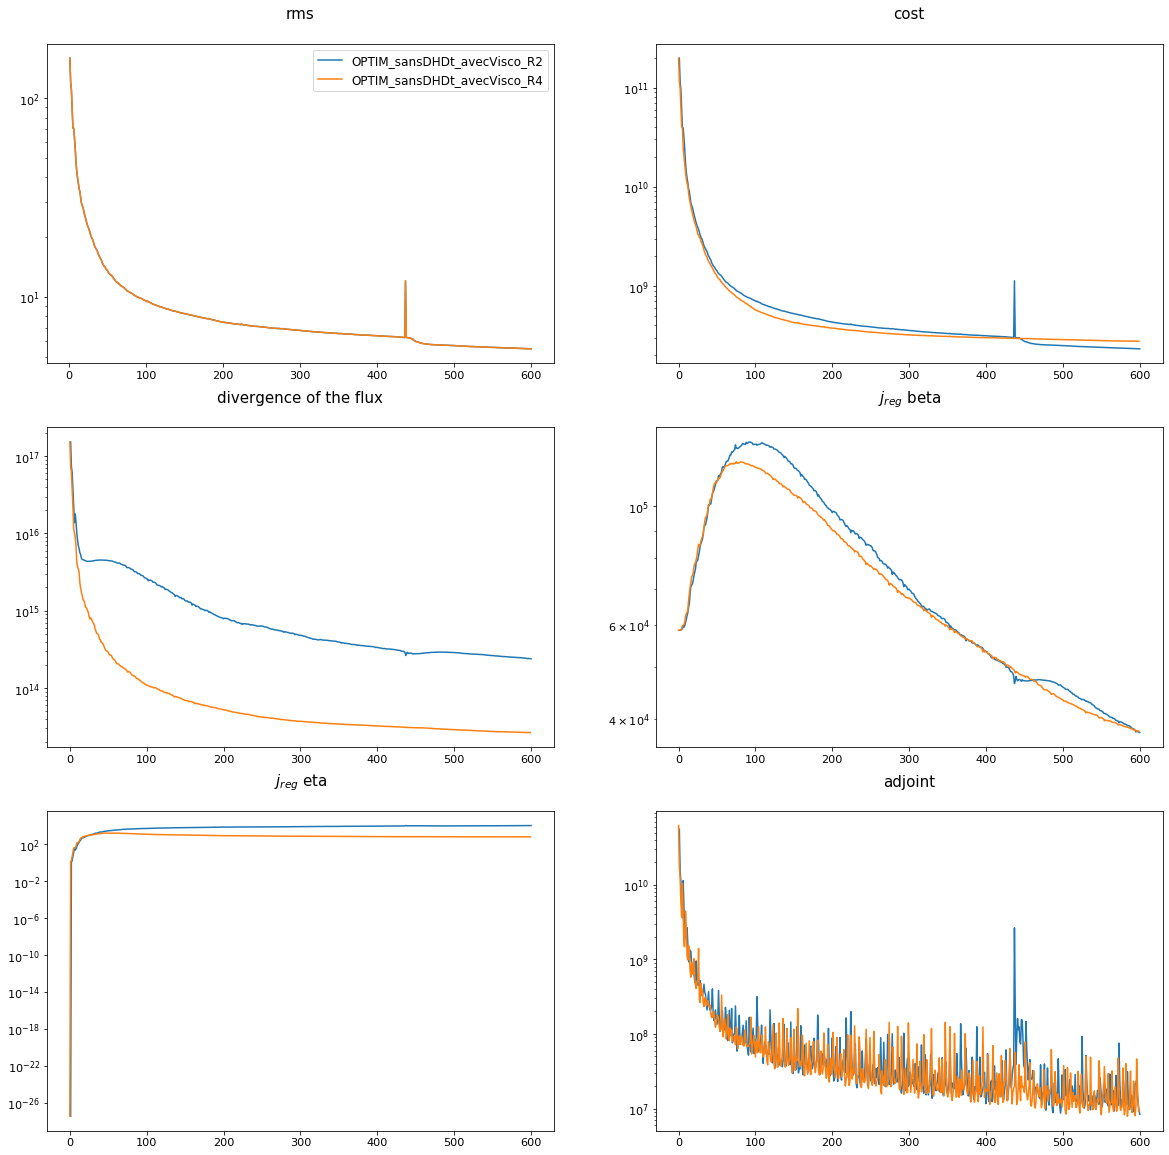

In [25]:
plt.figure(figsize=(20,20))

ax1=plt.subplot(3,2,1)
ax1.semilogy(iteration,rms,label=url[80:-1])
ax1.semilogy(iteration,rms,label=url1[80:-1])
ax1.set_title('rms')
ax1.legend()
ax2=plt.subplot(3,2,2)
ax2.semilogy(iteration,cost,cost1)
ax2.set_title('cost')
ax3=plt.subplot(3,2,3)
ax3.semilogy(iteration,Jdiv,Jdiv1)
ax3.set_title('divergence of the flux')
ax4=plt.subplot(3,2,4)
ax4.semilogy(iteration,jregbeta,jregbeta1)
ax4.set_title(r'$j_{reg}$ beta')
ax5=plt.subplot(3,2,5)
ax5.semilogy(iteration,jregeta,jregeta1)
ax5.set_title(r'$j_{reg}$ eta')
ax6=plt.subplot(3,2,6)
ax6.semilogy(iteration,adjoint,adjoint1)
ax6.set_title('adjoint')


## Comparison Eta

In [ ]:
from IPython.display import Image
gif = figure + '/Eta.gif'


pl = pv.Plotter()


pl.open_gif(gif)


for i in range(0, len(blocks1)):
    flow_a = blocks[i].point_arrays['eta'].copy()
    flow_b = blocks1[i].point_arrays['eta'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    blocks[i].point_arrays['flow_diff'] = abs(flow_diff)

    pl.add_mesh(blocks[i], scalars='flow_diff' , cmap='Blues', clim=[0,1], log_scale=False)
    pl.add_text(str(i), position='upper_left', font_size=18,
                color=None, font=None, shadow=True, viewport=False)
    for n in range(10):
        pl.write_frame()
    pl.clear()


pl.close()

In [ ]:
for i in range(0, len(blocks1)):
    # compare velocity
    # these appear to be flow vectors of some sort.  Normalize them so we
    # can get a reasonable direction comparison
    flow_a = blocks[i].point_arrays['eta'].copy()
    flow_b = blocks1[i].point_arrays['eta'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    q1 = np.quantile(flow_diff, 0.005)
    q2 = np.quantile(flow_diff, 0.995)
    std1 = np.mean(flow_diff)-np.std(flow_diff)
    std2 = np.mean(flow_diff)+np.std(flow_diff)
#     # plot normalized vectors
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff',clim=[0.1,1E4],cmap='Blues', log_scale=True)
#     pl.add_text(str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=1000000/delta, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
    ax1.hist(flow_diff, bins=100)
#     ax1.plot([std1, std1], [0, 3500000], [std2, std2],
#              [0, 3500000], c='r', label='std')
#     ax1.plot([q1, q1], [0, 3500000], label='quantile 0,5%', c='k')
#     ax1.plot([q2, q2], [0, 3500000], label='quantile 99,5%', c='k')
#     ax1.set_yscale('log')
#     ax1.legend()
#     ax1.set_xlim([-2000, 3000])
    ax2.boxplot(flow_diff, showfliers=False)
#     ax2.set_ylim([-230, 200])
    plt.suptitle('year = ' + str(i))
    plt.show()

## difference ssa velocity

We observed that the difference in velocity between these two simulations (bedmachine_modified and bedmap_modified) are higher until the year 7. The difference can be more than 8000m/yrs at the beginning of the simulation.

### U component
If we take a look to the components of the speed the 'u' is more impacted during the 2 first years of simulations. 
The u component has high variation on the aymery and larsen ice-shelf, also on some part of the Ross and Ronne Ice-Shelf 

### V component
The v component as more variation on the "north" ice-shelf part of antarctica. We observe an increase of the V component difference during the whole simulation.

We observe a diminution of the value range by two from the first simulation to the last one.

The observations suggest a converging of the simulation to similar surface velocity

In [ ]:
from IPython.display import Image
gif = figure + '/ssadiff.gif'
gif1 = figure + '/ssadiffu.gif'
gif2 = figure + '/ssadiffv.gif'

pl = pv.Plotter()
pl1 = pv.Plotter()
pl2 = pv.Plotter()

pl.open_gif(gif)
pl1.open_gif(gif1)
pl2.open_gif(gif2)

for i in range(0, len(blocks1)):
    flow_a = blocks[i].point_arrays['ssavelocity'].copy()
    flow_b = blocks1[i].point_arrays['ssavelocity'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    blocks[i].point_arrays['flow_diff_u'] = flow_diff[:, 0]
    blocks[i].point_arrays['flow_diff_v'] = flow_diff[:, 1]
    blocks[i].point_arrays['flow_diff'] = flow_diff

    pl.add_mesh(blocks[i], scalars='flow_diff', clim=[
                0.1, 10], cmap='Blues', log_scale=False)
    pl.add_text('year = '+str(i), position='upper_left', font_size=18,
                color=None, font=None, shadow=True, viewport=False)
#     plotter.write_frame()
    for n in range(10):
        pl.write_frame()
    pl.clear()

    pl1.add_mesh(blocks[i], scalars='flow_diff_u', clim=[
                 0.1, 10], cmap='Blues', log_scale=False)
    pl1.add_text('year = '+str(i)+'  component u', position='upper_left',
                 font_size=18, color=None, font=None, shadow=True, viewport=False)
#     plotter.write_frame()
    for n in range(10):
        pl1.write_frame()
    pl1.clear()

    pl2.add_mesh(blocks[i], scalars='flow_diff_v', clim=[
                 0.1, 10], cmap='Blues', log_scale=False)
    pl2.add_text('year = '+str(i)+'  component v', position='upper_left',
                 font_size=18, color=None, font=None, shadow=True, viewport=False)
#     plotter.write_frame()
    for n in range(10):
        pl2.write_frame()
    pl2.clear()

pl.close()
pl1.close()
pl2.close()

In [ ]:
for i in range(0, len(blocks1)):
    # compare velocity
    # these appear to be flow vectors of some sort.  Normalize them so we
    # can get a reasonable direction comparison
    flow_a = blocks[i].point_arrays['ssavelocity'].copy()
    flow_b = blocks1[i].point_arrays['ssavelocity'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    blocks[i].point_arrays['flow_diff_u'] = flow_diff[:, 0]
    blocks[i].point_arrays['flow_diff_v'] = flow_diff[:, 1]
    blocks[i].point_arrays['flow_diff'] = flow_diff


#     # plot normalized vectors
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff',clim=[0.1,1E4],cmap='Blues', log_scale=True)
#     pl.add_text('year = '+str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=1000000/delta, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff_u',clim=[0.1,1E4],cmap='Blues', log_scale=True)
#     pl.add_text('year = '+str(i)+'  component u',position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=1000000/delta, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff_v',clim=[0.1,1E4],cmap='Blues', log_scale=True)
#     pl.add_text('year = '+str(i)+'  component v',position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=1000000/delta, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')

    mag = np.sqrt(flow_diff[:, 0]**2+flow_diff[:, 1]**2)
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
    ax1.hist(flow_diff[:, 0:2], bins=100, label=['u', 'v'])
    ax1.legend()
    ax1.set_yscale('log')
    ax1.set_title(
        'distribution of the difference of velocity for each component ')
    ax1.set_xlim([-8000, 4000])
    ax2.hist(mag, bins=100)
    ax2.set_title('distribution of the difference of velocity')
    ax2.set_yscale('log')
    ax2.set_xlim([0, 8000])

    plt.suptitle('year = ' + str(i))

    plt.figure(figsize=[10, 10])
    plt.boxplot(flow_diff[:, 0:2], showfliers=False)
    plt.xticks([1, 2], ['u', 'v'])
    plt.ylim([-100, 100])
    plt.show()

## comparaison dh/dt

When we compare the dh/dt of the twos simulations, we observe highest difference at the beginning during year 0 to 4. This difference is decreasing with time to reach a state where it's less than 50m/year.

99% of the values are in a really thin interval.

The diminution of the standard derivation mean that the twos simulations are converging to similar values of dh/dt.

In [ ]:
blocks[1]

In [ ]:
from IPython.display import Image
gif = figure + '/djdbeta.gif'


pl = pv.Plotter()


pl.open_gif(gif)


for i in range(0, len(blocks1)):
    flow_a = blocks[i].point_arrays['djdbeta'].copy()
    flow_b = blocks1[i].point_arrays['djdbeta'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    blocks[i].point_arrays['flow_diff'] = flow_diff

    pl.add_mesh(blocks[i], scalars='flow_diff', cmap='Blues',clim=[-15e-3,15e3], log_scale=False)
    pl.add_text(str(i), position='upper_left', font_size=18,
                color=None, font=None, shadow=True, viewport=False)
    for n in range(10):
        pl.write_frame()
    pl.clear()


pl.close()
Image(gif)

In [ ]:
for i in range(0, len(blocks1)):
    # compare velocity
    # these appear to be flow vectors of some sort.  Normalize them so we
    # can get a reasonable direction comparison
    flow_a = blocks[i].point_arrays['djdbeta'].copy()
    flow_b = blocks1[i].point_arrays['djdbeta'].copy()
    flow_diff = (flow_b-flow_a)
    delta = np.max(flow_diff)-np.min(flow_diff)
    q1 = np.quantile(flow_diff, 0.005)
    q2 = np.quantile(flow_diff, 0.995)
    std1 = np.mean(flow_diff)-np.std(flow_diff)
    std2 = np.mean(flow_diff)+np.std(flow_diff)
#     # plot normalized vectors
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff',clim=[0.1,1E4],cmap='Blues', log_scale=True)
#     pl.add_text(str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=1000000/delta, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
    ax1.hist(flow_diff, bins=100)
#     ax1.plot([std1, std1], [0, 3500000], [std2, std2],
#              [0, 3500000], c='r', label='std')
#     ax1.plot([q1, q1], [0, 3500000], label='quantile 0,5%', c='k')
#     ax1.plot([q2, q2], [0, 3500000], label='quantile 99,5%', c='k')
#     ax1.set_yscale('log')
#     ax1.legend()
#     ax1.set_xlim([-500, 900])
#     ax2.boxplot(flow_diff, showfliers=False)
    ax2.set_ylim([-8, 8])
    plt.suptitle('year = ' + str(i))
    plt.show()